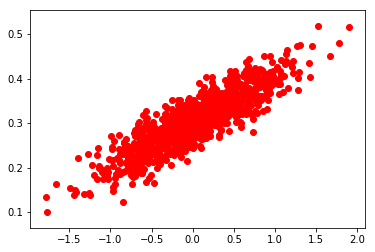

In [8]:
#简单的线性回归 Tensorflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#随机生成1000个点，图像在y=0.1x+0.3的直线周围
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1 = np.random.normal(0.0,0.55)
    y1 = x1 *0.1 + 0.3 + np.random.normal(0.0,0.03)
    vectors_set.append([x1,y1])

#生成一些样本
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

plt.scatter(x_data,y_data,c='r')
plt.show()

In [15]:
#根据上例，根据得到的数据找到最好的直线参数w,b
#生成一维的矩阵，取值是【-1,1】之间的随机数
w =tf.Variable(tf.random_uniform([1],-1.0,1.0),name='w')
#生成一维的b矩阵，初始值为0
b = tf.Variable(tf.zeros([1]),name='b')
#经过计算得出预估值
y = w*x_data +b

#以预估值y和实际值y_data之间的均方误差作为损失
loss = tf.reduce_mean(tf.square(y - y_data),name='loss')
#采用梯度下降法来优化参数
optimizer = tf.train.GradientDescentOptimizer(0.5)#学习率
#训练的过程就是最小化的这个误差值
train = optimizer.minimize(loss,name='train')

sess = tf.Session()

init = tf.global_variables_initializer()
sess.run(init)

#初始化的w和b是多少
print("w=",sess.run(w),"b=",sess.run(b),"loss=",sess.run(loss))
#执行20次训练
for step in range(20):
    sess.run(train)
    #输出训练好的w、b
    print("w=",sess.run(w),"b=",sess.run(b),"loss=",sess.run(loss))


w= [0.14176059] b= [0.] loss= 0.09316457
w= [0.12551396] b= [0.30283743] loss= 0.0011168482
w= [0.11761324] b= [0.30265552] loss= 0.0010109784
w= [0.11212015] b= [0.30256703] loss= 0.00095981447
w= [0.10830142] b= [0.30250552] loss= 0.00093508756
w= [0.10564668] b= [0.3024628] loss= 0.0009231374
w= [0.10380115] b= [0.30243304] loss= 0.00091736217
w= [0.10251815] b= [0.3024124] loss= 0.000914571
w= [0.10162622] b= [0.30239803] loss= 0.00091322215
w= [0.10100617] b= [0.30238804] loss= 0.0009125701
w= [0.10057512] b= [0.3023811] loss= 0.00091225514
w= [0.10027545] b= [0.30237627] loss= 0.0009121028
w= [0.10006712] b= [0.3023729] loss= 0.00091202924
w= [0.0999223] b= [0.30237058] loss= 0.00091199373
w= [0.09982162] b= [0.30236897] loss= 0.00091197644
w= [0.09975163] b= [0.30236784] loss= 0.0009119681
w= [0.09970297] b= [0.30236703] loss= 0.00091196416
w= [0.09966914] b= [0.3023665] loss= 0.0009119622
w= [0.09964563] b= [0.30236614] loss= 0.00091196137
w= [0.09962928] b= [0.30236587] loss= 

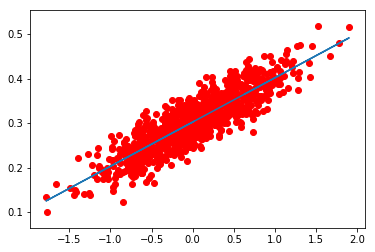

In [17]:
plt.scatter(x_data,y_data,c='r')
plt.plot(x_data,sess.run(w)*x_data+sess.run(b))